In [ ]:
import pandas as pd
import numpy as np

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [ ]:
# importing data and set index as datetime
df=pd.read_csv("BTCUSDT_1d.csv",index_col=["datetime"])
df=df[["open","high","low","close","volume"]]
df.index=pd.to_datetime(df.index)
df.head(3)

,open,high,low,close,volume
datetime,,,,,
2018-01-01 05:30:00,13715.65,13818.55,12750.00,13380.00,8609.915844
2018-01-02 05:30:00,13382.16,15473.49,12890.02,14675.11,20078.092111
2018-01-03 05:30:00,14690.00,15307.56,14150.00,14919.51,15905.667639


In [ ]:
# df info that there are no null values and index is DatetimeIndex from 2018-01-01 to 2023-01-23
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1849 entries, 2018-01-01 05:30:00 to 2023-01-23 05:30:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1849 non-null   float64
 1   high    1849 non-null   float64
 2   low     1849 non-null   float64
 3   close   1849 non-null   float64
 4   volume  1849 non-null   float64
dtypes: float64(5)
memory usage: 86.7 KB


In [ ]:
# features calculations like returns , moving averages and vwap(Volume-weighted average price)
df['returns']=df["close"].pct_change()
df['S_7'] = df['close'].rolling(window=7).mean()
df["vwap"]=(df["close"]*df["volume"]).cumsum()/(df["volume"].cumsum())
# drop NA values
df = df.dropna()
df

,open,high,low,close,volume,returns,S_7,vwap
datetime,,,,,,,,
2018-01-07 05:30:00,17069.79,17099.96,15610.00,16150.03,12493.125558,-0.053882,15459.195714,15647.932063
2018-01-08 05:30:00,16218.85,16322.30,12812.00,14902.54,26600.609912,-0.077244,15676.701429,15512.901538
2018-01-09 05:30:00,14902.54,15500.00,14011.05,14400.00,14315.004253,-0.033722,15637.400000,15414.045226
2018-01-10 05:30:00,14401.00,14955.66,13131.31,14907.09,17411.001655,0.035215,15635.625714,15364.614777
2018-01-11 05:30:00,14940.00,14968.68,11400.00,13238.78,33554.723751,-0.111914,15375.517143,15028.335548
...,...,...,...,...,...,...,...,...
2023-01-19 05:30:00,20677.47,21192.00,20659.19,21071.59,251385.849250,0.019060,20832.278571,21357.190075
2023-01-20 05:30:00,21071.59,22755.93,20861.28,22667.21,338079.136590,0.075724,21223.307143,21360.394615
2023-01-21 05:30:00,22666.00,23371.80,22422.00,22783.55,346445.484320,0.005133,21484.540000,21363.953134


In [ ]:
# for buying condition price should be above moving average and vwap then signal is 1 otherwise -1.
df["buy/sell"]=np.where((df['close'].shift(1) > df['S_7']) & (df["close"].shift(1)>df["vwap"]),1,-1)
df

,open,high,low,close,volume,returns,S_7,vwap,buy/sell
datetime,,,,,,,,,
2018-01-07 05:30:00,17069.79,17099.96,15610.00,16150.03,12493.125558,-0.053882,15459.195714,15647.932063,-1
2018-01-08 05:30:00,16218.85,16322.30,12812.00,14902.54,26600.609912,-0.077244,15676.701429,15512.901538,1
2018-01-09 05:30:00,14902.54,15500.00,14011.05,14400.00,14315.004253,-0.033722,15637.400000,15414.045226,-1
2018-01-10 05:30:00,14401.00,14955.66,13131.31,14907.09,17411.001655,0.035215,15635.625714,15364.614777,-1
2018-01-11 05:30:00,14940.00,14968.68,11400.00,13238.78,33554.723751,-0.111914,15375.517143,15028.335548,-1
...,...,...,...,...,...,...,...,...,...
2023-01-19 05:30:00,20677.47,21192.00,20659.19,21071.59,251385.849250,0.019060,20832.278571,21357.190075,-1
2023-01-20 05:30:00,21071.59,22755.93,20861.28,22667.21,338079.136590,0.075724,21223.307143,21360.394615,-1
2023-01-21 05:30:00,22666.00,23371.80,22422.00,22783.55,346445.484320,0.005133,21484.540000,21363.953134,1


In [ ]:
# these are the independent variables 
X= df[["volume","returns","S_7","vwap"]]
X.head(1)

,volume,returns,S_7,vwap
datetime,,,,
2018-01-07 05:30:00,12493.125558,-0.053882,15459.195714,15647.932063


In [ ]:
# This is dependent variables
y=df["buy/sell"]
y.head(1)

datetime
2018-01-07 05:30:00   -1
Name: buy/sell, dtype: int32

In [ ]:
# import sklearn for logistic Regression model and spliting the data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
# fiting data to the model
model = LogisticRegression()
model = model.fit (X_train,y_train)

In [ ]:
# these are the coefficient and they show the weights of the variables in the linear equation 
pd.DataFrame(zip(X.columns, np.transpose(model.coef_[0])),columns=["columns","coefficient"])

,columns,coefficient
0,volume,3.014838e-06
1,returns,-5.509764e-10
2,S_7,8.217722e-05
3,vwap,-2.042054e-04


In [ ]:
# this varible contains the predicted values
predicted = model.predict(X_test)

In [ ]:
print(model.score(X_test,y_test))

0.7197106690777577


In [ ]:
# the confusion matrix 
print(metrics.confusion_matrix(y_test, predicted))

[[349  42]
 [113  49]]


In [ ]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.76      0.89      0.82       391
           1       0.54      0.30      0.39       162

    accuracy                           0.72       553
   macro avg       0.65      0.60      0.60       553
weighted avg       0.69      0.72      0.69       553



<AxesSubplot:xlabel='datetime'>

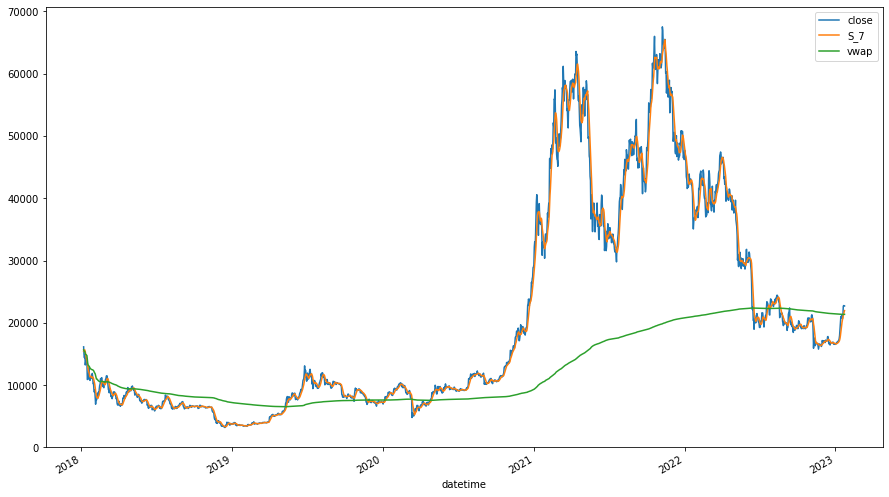

In [ ]:
df[["close","S_7","vwap"]].plot(figsize=(15,9))